In [ ]:
from pandas_datareader import data as pdr #read data from yahoo finance api
import matplotlib.pyplot as plt #viz #GUI manager
import seaborn as sns #viz #plotly is another package
import datetime 
import pandas as pd
import numpy as np
from pandas import Grouper #groupby
#statistical data exploration, conducting statistical tests, and estimation of different statistical models
import statsmodels.api as sm 
from statsmodels.graphics.tsaplots import plot_acf #autocorrelation plot
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing # double and triple exponential smoothing
from pandas.plotting import autocorrelation_plot #autocorrelation plot
from statsmodels.graphics.gofplots import qqplot #residual diagnostics
from sklearn.metrics import mean_squared_error #accuracy metrics
from math import sqrt
from sklearn.metrics import mean_absolute_error #accuracy metrics

from random import gauss #create gaussian white noise
from random import seed
from pandas import Series 
from datetime import datetime

In [ ]:
crop_land_data = pd.read_csv('/content/drive/MyDrive/Time Series Project/wheat_yield_data.txt', sep='\t')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
crop_land_data['Year'] = pd.to_datetime(crop_land_data['Year'], format='%Y')
crop_land_data

,State,District,Year,Year_Extra,Season,Area (Hectare),Production (Tonnes),Yield (Tonnes/Hectare)
0,Andhra Pradesh,1.ADILABAD,1998-01-01,1997-98,Rabi,3600.0,2000.0,0.56
1,Andhra Pradesh,1.ADILABAD,1999-01-01,1998-99,Rabi,2800.0,1600.0,0.57
2,Andhra Pradesh,1.ADILABAD,2000-01-01,1999-00,Rabi,3964.0,2656.0,0.67
3,Andhra Pradesh,1.ADILABAD,2001-01-01,2000-01,Rabi,3681.0,1848.0,0.50
4,Andhra Pradesh,1.ADILABAD,2002-01-01,2001-02,Rabi,3721.0,3327.0,0.89
...,...,...,...,...,...,...,...,...
10753,West Bengal,22.PURULIA,2016-01-01,2015-16,Rabi,855.0,1241.0,1.45
10754,West Bengal,22.PURULIA,2017-01-01,2016-17,Rabi,1366.0,2415.0,1.77
10755,West Bengal,22.PURULIA,2018-01-01,2017-18,Rabi,1052.0,2145.0,2.04
10756,West Bengal,22.PURULIA,2019-01-01,2018-19,Rabi,833.0,2114.0,2.54


In [ ]:
region_data = crop_land_data[(crop_land_data['Year'] == '2020-01-01')]

In [ ]:
region_data

,State,District,Year,Year_Extra,Season,Area (Hectare),Production (Tonnes),Yield (Tonnes/Hectare)
33,Andhra Pradesh,2.ANANTAPUR,2020-01-01,2019-20,Rabi,10.0,3.0,0.30
41,Andhra Pradesh,4.GUNTUR,2020-01-01,2019-20,Rabi,1.0,NaN,0.00
60,Andhra Pradesh,5.KADAPA,2020-01-01,2019-20,Rabi,1.0,NaN,0.00
95,Andhra Pradesh,7.KURNOOL,2020-01-01,2019-20,Rabi,25.0,8.0,0.32
203,Arunachal Pradesh,2.CHANGLANG,2020-01-01,2019-20,Rabi,375.0,862.0,2.30
...,...,...,...,...,...,...,...,...
10686,West Bengal,18.MURSHIDABAD,2020-01-01,2019-20,Rabi,52709.0,136454.0,2.59
10707,West Bengal,19.NADIA,2020-01-01,2019-20,Rabi,6188.0,16748.0,2.71
10711,West Bengal,20.PASCHIM BARDHAMAN\r\n,2020-01-01,2019-20,Rabi,929.0,3946.0,4.25
10734,West Bengal,21.PURBA BARDHAMAN,2020-01-01,2019-20,Rabi,1832.0,5678.0,3.10


In [ ]:
set_region = region_data['District'].unique()
set_region

array([' 2.ANANTAPUR', ' 4.GUNTUR', ' 5.KADAPA', ' 7.KURNOOL',
       ' 2.CHANGLANG', ' 4.EAST KAMENG', ' 5.EAST SIANG', ' 7.LOHIT',
       ' 8.LOWER DIBANG VALLEY', ' 9.LOWER SIANG', ' 11.NAMSAI',
       ' 12.PAKKE KESSANG', ' 13.PAPUM PARE', ' 14.TAWANG', ' 15.TIRAP',
       ' 18.WEST KAMENG', ' 1.BAKSA', ' 2.BARPETA', ' 3.BONGAIGAON',
       ' 4.CACHAR', ' 5.CHIRANG', ' 6.DARRANG', ' 7.DHEMAJI', ' 8.DHUBRI',
       ' 9.DIBRUGARH', ' 11.GOALPARA', ' 12.GOLAGHAT', ' 13.HAILAKANDI',
       ' 14.JORHAT', ' 15.KAMRUP', ' 16.KAMRUP METRO', ' 19.KOKRAJHAR',
       ' 20.LAKHIMPUR', ' 21.MARIGAON', ' 22.NAGAON', ' 23.NALBARI',
       ' 24.SIVASAGAR', ' 25.SONITPUR', ' 26.TINSUKIA', ' 27.UDALGURI',
       ' 1.ARARIA', ' 2.ARWAL', ' 3.AURANGABAD', ' 4.BANKA',
       ' 5.BEGUSARAI', ' 6.BHAGALPUR', ' 7.BHOJPUR', ' 9.BUXAR',
       ' 11.DARBHANGA', ' 17.GAYA', ' 20.GOPALGANJ', ' 23.JAMUI',
       ' 24.JEHANABAD', ' 25.KAIMUR (BHABUA)', ' 26.KATIHAR',
       ' 27.KHAGARIA', ' 28.KISHANGANJ', ' 30

In [ ]:
crop_land_data = crop_land_data[crop_land_data['District'].isin(set_region)]

In [ ]:
crop_land_data

,State,District,Year,Year_Extra,Season,Area (Hectare),Production (Tonnes),Yield (Tonnes/Hectare)
0,Andhra Pradesh,1.ADILABAD,1998-01-01,1997-98,Rabi,3600.0,2000.0,0.56
1,Andhra Pradesh,1.ADILABAD,1999-01-01,1998-99,Rabi,2800.0,1600.0,0.57
2,Andhra Pradesh,1.ADILABAD,2000-01-01,1999-00,Rabi,3964.0,2656.0,0.67
3,Andhra Pradesh,1.ADILABAD,2001-01-01,2000-01,Rabi,3681.0,1848.0,0.50
4,Andhra Pradesh,1.ADILABAD,2002-01-01,2001-02,Rabi,3721.0,3327.0,0.89
...,...,...,...,...,...,...,...,...
10753,West Bengal,22.PURULIA,2016-01-01,2015-16,Rabi,855.0,1241.0,1.45
10754,West Bengal,22.PURULIA,2017-01-01,2016-17,Rabi,1366.0,2415.0,1.77
10755,West Bengal,22.PURULIA,2018-01-01,2017-18,Rabi,1052.0,2145.0,2.04
10756,West Bengal,22.PURULIA,2019-01-01,2018-19,Rabi,833.0,2114.0,2.54


In [ ]:
crop_land_data['Year'] = pd.DatetimeIndex(crop_land_data['Year']).year
crop_land_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,State,District,Year,Year_Extra,Season,Area (Hectare),Production (Tonnes),Yield (Tonnes/Hectare)
0,Andhra Pradesh,1.ADILABAD,1998,1997-98,Rabi,3600.0,2000.0,0.56
1,Andhra Pradesh,1.ADILABAD,1999,1998-99,Rabi,2800.0,1600.0,0.57
2,Andhra Pradesh,1.ADILABAD,2000,1999-00,Rabi,3964.0,2656.0,0.67
3,Andhra Pradesh,1.ADILABAD,2001,2000-01,Rabi,3681.0,1848.0,0.50
4,Andhra Pradesh,1.ADILABAD,2002,2001-02,Rabi,3721.0,3327.0,0.89
...,...,...,...,...,...,...,...,...
10753,West Bengal,22.PURULIA,2016,2015-16,Rabi,855.0,1241.0,1.45
10754,West Bengal,22.PURULIA,2017,2016-17,Rabi,1366.0,2415.0,1.77
10755,West Bengal,22.PURULIA,2018,2017-18,Rabi,1052.0,2145.0,2.04
10756,West Bengal,22.PURULIA,2019,2018-19,Rabi,833.0,2114.0,2.54


In [ ]:
crop_price_data = pd.read_csv('/content/drive/MyDrive/Time Series Project/wheat_data.txt', sep='\t')

In [ ]:
crop_price_data

,Month,Price
0,5/1/2002,5951.54
1,6/1/2002,6464.34
2,7/1/2002,7280.94
3,8/1/2002,7835.70
4,9/1/2002,9099.18
...,...,...
235,12/1/2021,28463.96
236,1/1/2022,27861.55
237,2/1/2022,29300.08
238,3/1/2022,37077.69


In [ ]:
crop_price_data['Month'] = pd.to_datetime(crop_price_data['Month'])
crop_price_data['Price'] = crop_price_data['Price'].astype(float)
crop_price_data = crop_price_data.set_index(crop_price_data['Month'])
crop_price_data

,Month,Price
Month,,
2002-05-01,2002-05-01,5951.54
2002-06-01,2002-06-01,6464.34
2002-07-01,2002-07-01,7280.94
2002-08-01,2002-08-01,7835.70
2002-09-01,2002-09-01,9099.18
...,...,...
2021-12-01,2021-12-01,28463.96
2022-01-01,2022-01-01,27861.55
2022-02-01,2022-02-01,29300.08


In [ ]:
crop_price_data.drop(columns={'Month'},inplace=True)

In [ ]:

crop_price_data = crop_price_data.resample('Y').sum()/12

In [ ]:
crop_price_data

,Price
Month,
2002-12-31,5184.855833
2003-12-31,6804.928333
2004-12-31,7105.751667
2005-12-31,6724.467500
2006-12-31,8705.698333
2007-12-31,10467.359167
2008-12-31,13961.342500
2009-12-31,10857.124167
2010-12-31,10204.839167


In [ ]:
crop_price_data = crop_price_data.set_index(crop_price_data.index.year)

In [ ]:
crop_price_data

,Price
Month,
2002,5184.855833
2003,6804.928333
2004,7105.751667
2005,6724.467500
2006,8705.698333
2007,10467.359167
2008,13961.342500
2009,10857.124167
2010,10204.839167


In [ ]:
wheat_data = crop_price_data.merge(crop_land_data, left_on=crop_price_data.index,right_on=crop_land_data.Year)

In [ ]:
wheat_data

,key_0,Price,State,District,Year,Year_Extra,Season,Area (Hectare),Production (Tonnes),Yield (Tonnes/Hectare)
0,2002,5184.855833,Andhra Pradesh,1.ADILABAD,2002,2001-02,Rabi,3721.0,3327.0,0.89
1,2002,5184.855833,Andhra Pradesh,2.ANANTAPUR,2002,2001-02,Rabi,307.0,213.0,0.69
2,2002,5184.855833,Andhra Pradesh,5.KADAPA,2002,2001-02,Rabi,39.0,27.0,0.69
3,2002,5184.855833,Andhra Pradesh,7.KURNOOL,2002,2001-02,Rabi,1264.0,876.0,0.69
4,2002,5184.855833,Arunachal Pradesh,2.CHANGLANG,2002,2001-02,Rabi,200.0,220.0,1.10
...,...,...,...,...,...,...,...,...,...,...
7816,2020,17149.716667,West Bengal,18.MURSHIDABAD,2020,2019-20,Rabi,52709.0,136454.0,2.59
7817,2020,17149.716667,West Bengal,19.NADIA,2020,2019-20,Rabi,6188.0,16748.0,2.71
7818,2020,17149.716667,West Bengal,20.PASCHIM BARDHAMAN\r\n,2020,2019-20,Rabi,929.0,3946.0,4.25
7819,2020,17149.716667,West Bengal,21.PURBA BARDHAMAN,2020,2019-20,Rabi,1832.0,5678.0,3.10


In [ ]:
wheat_data.columns

Index(['key_0', 'Price', 'State', 'District', 'Year', 'Year_Extra', 'Season',
       'Area (Hectare)', 'Production (Tonnes)', 'Yield (Tonnes/Hectare)'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


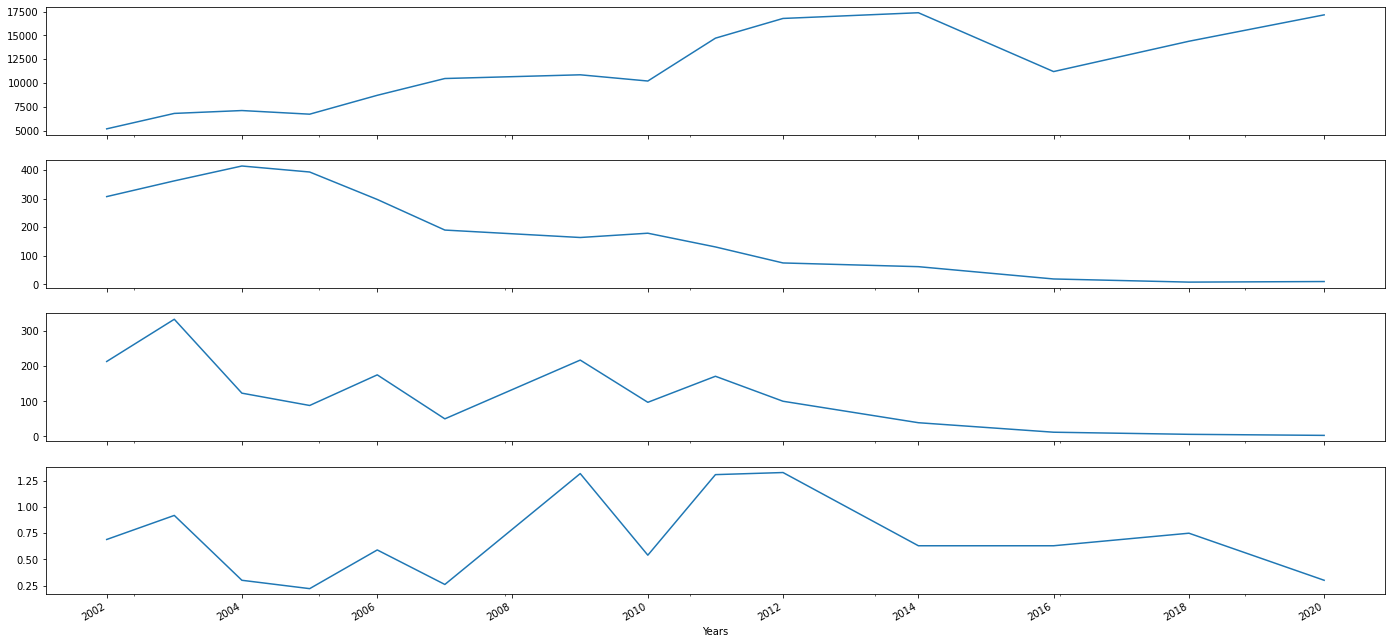

In [ ]:
fig, axs = plt.subplots(4, figsize=(24, 12), sharex=True)

anantapur_data = wheat_data[wheat_data['District']==' 2.ANANTAPUR']
anantapur_data['Year'] = pd.to_datetime(anantapur_data['Year'], format='%Y')
anantapur_data.set_index(anantapur_data.Year, inplace=True)
anantapur_data['Price'].plot(ax = axs[0])
anantapur_data['Area (Hectare)'].plot(ax = axs[1])
anantapur_data['Production (Tonnes)'].plot(ax = axs[2])
anantapur_data['Yield (Tonnes/Hectare)'].plot(ax = axs[3])


plt.xlabel('Years')
plt.show()

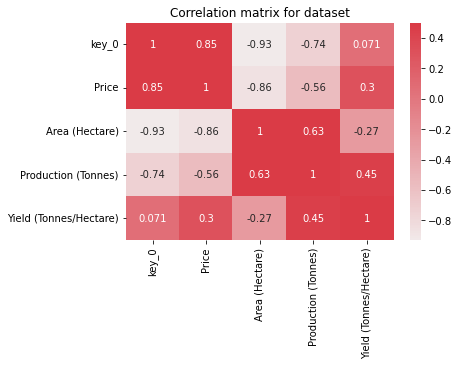

In [ ]:
correlation_matrix = anantapur_data.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(correlation_matrix, cmap=cmap, vmax=.5, center=-1, annot=True)
plt.title("Correlation matrix for dataset")
plt.show()

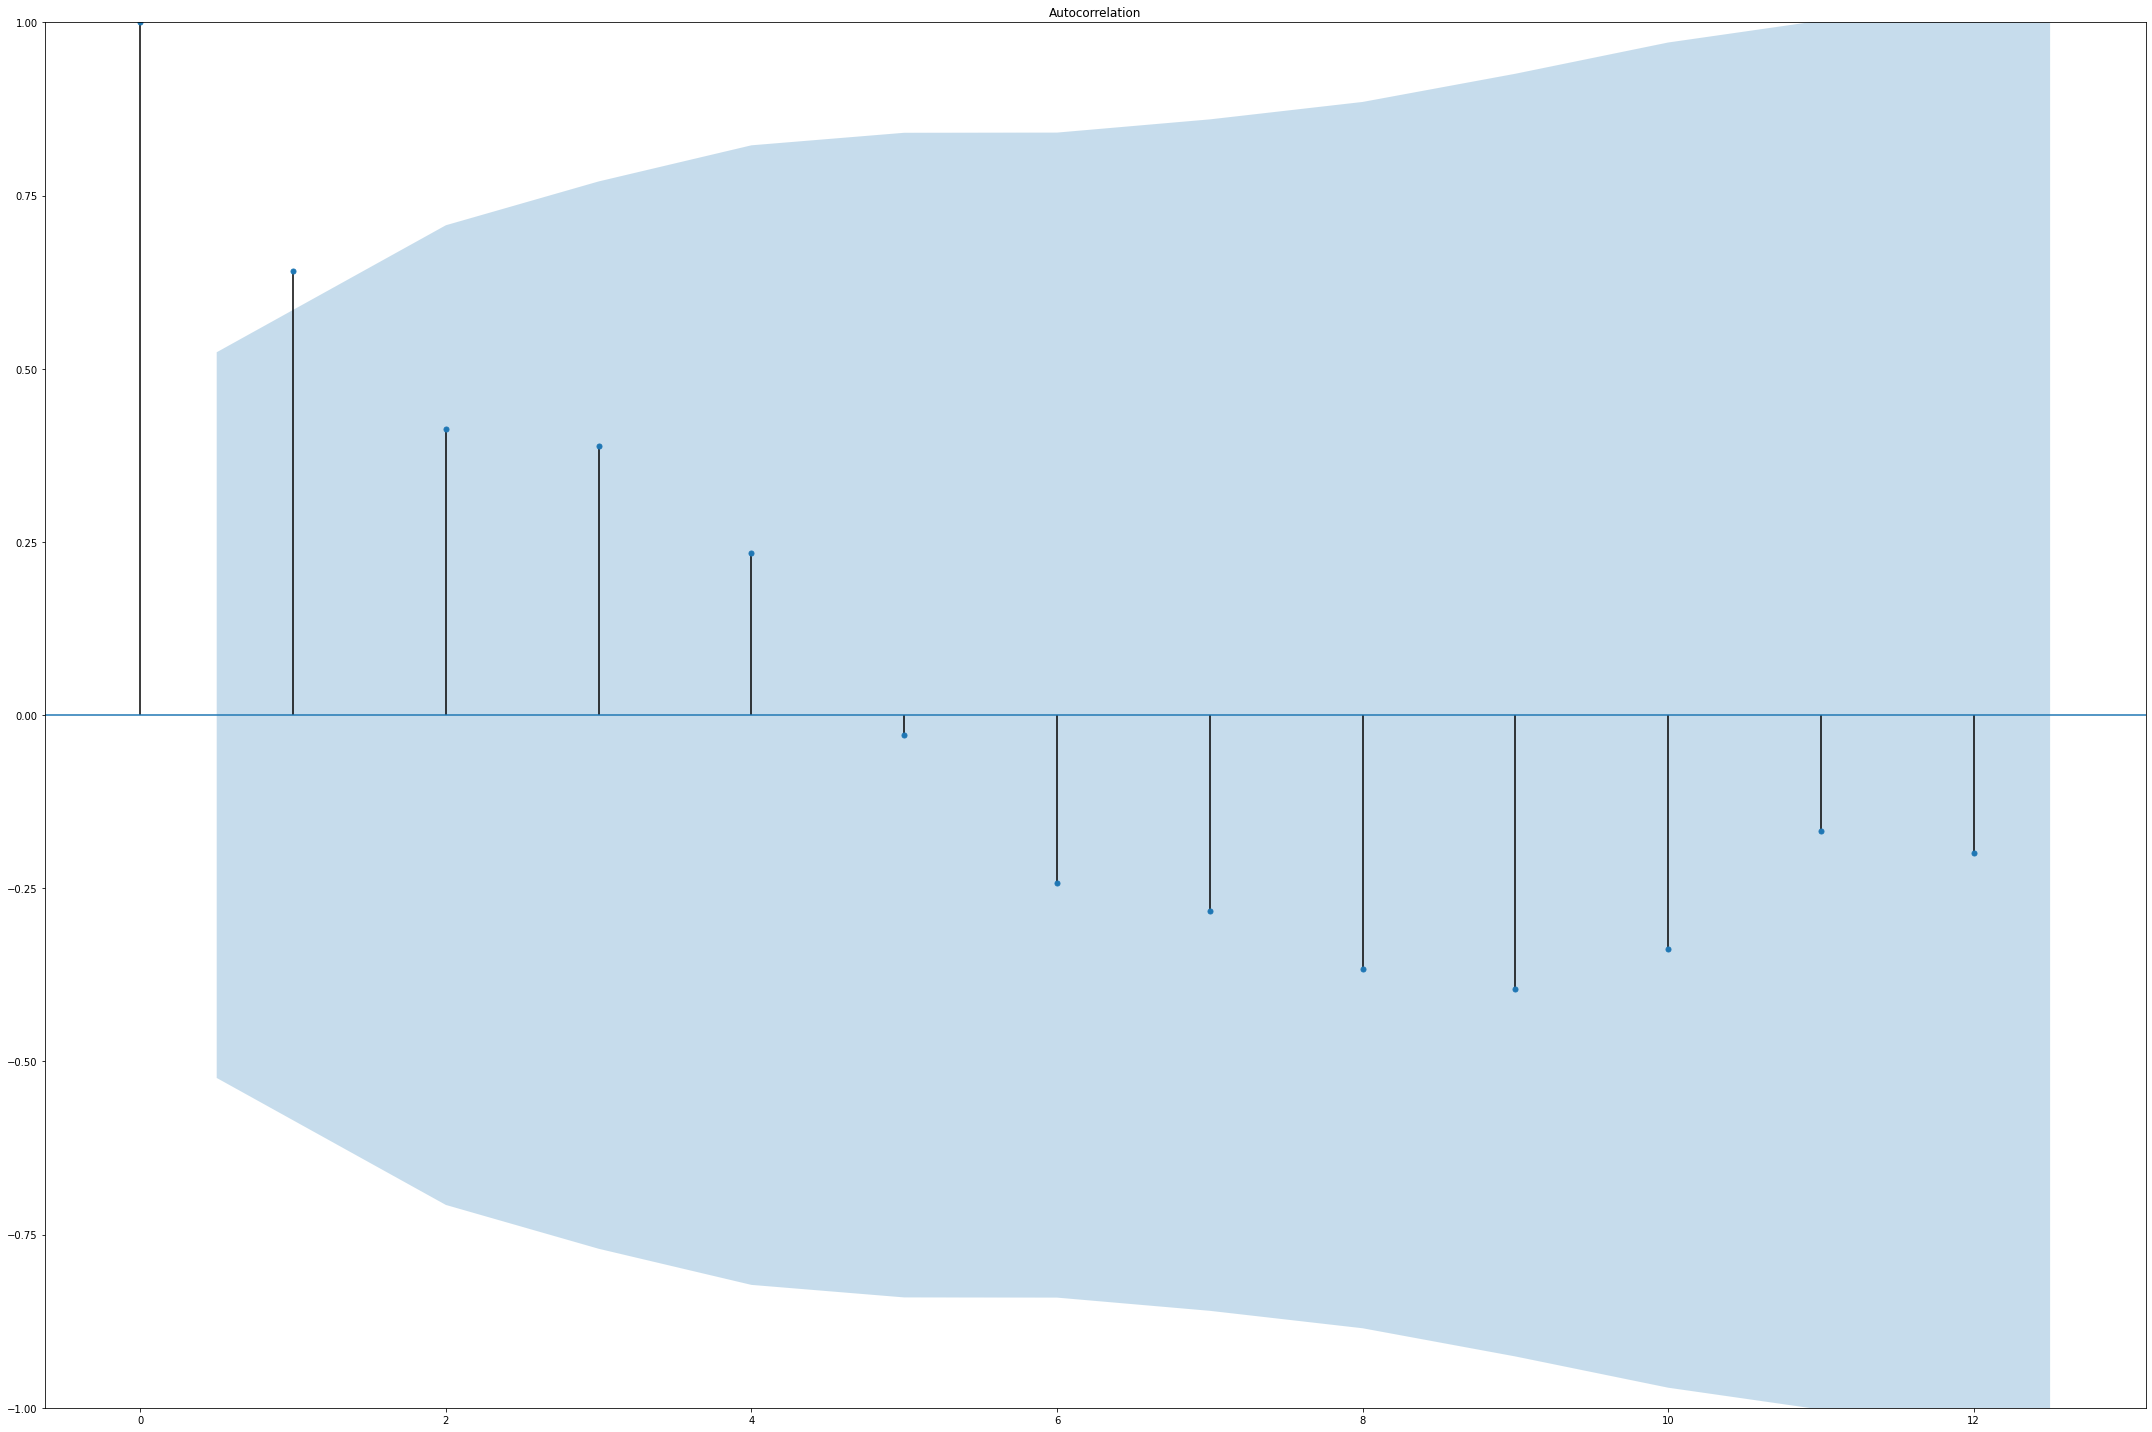

In [ ]:
fig = plot_acf(anantapur_data['Price'])
fig.set_size_inches((30, 20))
fig.tight_layout()
plt.show()

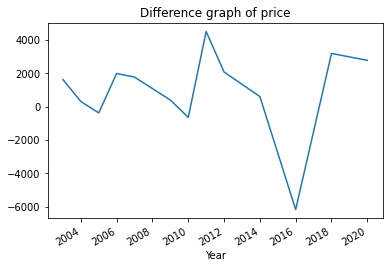

In [ ]:

diff_price_df = anantapur_data.Price.diff()
diff_price_df.plot()
plt.title("Difference graph of price")
plt.show()

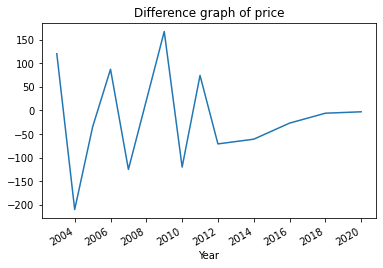

In [ ]:
diff_price_df = anantapur_data['Production (Tonnes)'].diff()
diff_price_df.plot()
plt.title("Difference graph of price")
plt.show()

In [ ]:
!pip install pmdarima
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 4.4 MB/s 


In [ ]:
from pandas_datareader import data as pdr #read data from yahoo finance api
import matplotlib.pyplot as plt #viz #GUI manager
import seaborn as sns #viz #plotly is another package
import datetime 
import pandas as pd
import numpy as np
from pandas import Grouper #groupby
#statistical data exploration, conducting statistical tests, and estimation of different statistical models
import statsmodels.api as sm 
from statsmodels.graphics.tsaplots import plot_acf #autocorrelation plot
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing # double and triple exponential smoothing
from pandas.plotting import autocorrelation_plot #autocorrelation plot
from statsmodels.graphics.gofplots import qqplot #residual diagnostics
from sklearn.metrics import mean_squared_error #accuracy metrics
from math import sqrt
from sklearn.metrics import mean_absolute_error #accuracy metrics

from random import gauss #create gaussian white noise
from random import seed
from pandas import Series 
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tsa.api import VAR
import pmdarima as pm #auto arima
import sklearn.metrics as metrics

import shap #explainable AI - XAI
from sklearn.ensemble import RandomForestRegressor

In [ ]:
anantapur_data

,key_0,Price,State,District,Year,Year_Extra,Season,Area (Hectare),Production (Tonnes),Yield (Tonnes/Hectare)
Year,,,,,,,,,,
2002-01-01,2002,5184.855833,Andhra Pradesh,2.ANANTAPUR,2002-01-01,2001-02,Rabi,307.0,213.0,0.69
2003-01-01,2003,6804.928333,Andhra Pradesh,2.ANANTAPUR,2003-01-01,2002-03,Rabi,362.0,333.0,0.92
2004-01-01,2004,7105.751667,Andhra Pradesh,2.ANANTAPUR,2004-01-01,2003-04,Rabi,414.0,123.0,0.30
2005-01-01,2005,6724.467500,Andhra Pradesh,2.ANANTAPUR,2005-01-01,2004-05,Rabi,393.0,88.0,0.22
2006-01-01,2006,8705.698333,Andhra Pradesh,2.ANANTAPUR,2006-01-01,2005-06,Rabi,297.0,175.0,0.59
2007-01-01,2007,10467.359167,Andhra Pradesh,2.ANANTAPUR,2007-01-01,2006-07,Rabi,190.0,50.0,0.26
2009-01-01,2009,10857.124167,Andhra Pradesh,2.ANANTAPUR,2009-01-01,2008-09,Rabi,164.0,217.0,1.32
2010-01-01,2010,10204.839167,Andhra Pradesh,2.ANANTAPUR,2010-01-01,2009-10,Rabi,179.0,97.0,0.54
2011-01-01,2011,14702.228333,Andhra Pradesh,2.ANANTAPUR,2011-01-01,2010-11,Rabi,131.0,171.0,1.31


In [ ]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(anantapur_data, test_size=1, random_state=25, shuffle = False)
#shuffle = False is very important to ensure the order of the data

print(f"No. of training examples: {train_data.shape[0]}")
print(f"No. of testing examples: {test_data.shape[0]}")

No. of training examples: 13
No. of testing examples: 1


In [ ]:
train_data.columns

Index(['key_0', 'Price', 'State', 'District', 'Year', 'Year_Extra', 'Season',
       'Area (Hectare)', 'Production (Tonnes)', 'Yield (Tonnes/Hectare)'],
      dtype='object')

In [ ]:
# SARIMAX Model
sxmodel = pm.auto_arima(train_data[['Price']], exogenous=train_data[['Area (Hectare)',	'Production (Tonnes)'	,'Yield (Tonnes/Hectare)']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=4, max_q=4,
                           start_P=0,
                           start_d=1, end_d =3, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=217.206, Time=0.62 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=221.337, Time=0.12 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=218.631, Time=0.25 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.40 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=216.597, Time=0.71 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=220.666, Time=0.55 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=214.443, Time=0.78 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=211.896, Time=0.32 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=212.719, Time=0.34 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=214.619, Time=0.43 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=212.632, Time=0.34 sec

Best model:  ARIMA(3,2,0)(0,0,0)[0]          
Total fit time: 4.927 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   13
Model:               SARIMAX(3, 2, 0)   Log Likelihood                 -98.948
Date:                Tue, 21 Jun 2022   AIC                            211.896
Time:                        17:53:37   BIC                            214.681
Sample:                             0   HQIC                           210.140
                                 - 13                                         
Covariance Type:                  opg                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Area (Hectare)             8.8211     20.565      0.429      0.668     -31.485      49.127
Production (Tonnes)       -3.5350     41.629     -0.085      0.932     -85.126      78.056
Yield (Tonnes/Hectare)   315.7560   6827.463      0.046      0.963   -1.31e+04    1.37e+04
ar.L1                     -0.7510      0.666     -1.128      0.259      -2.056       0.554
ar.L2                     -0.7605      1.364     -0.557      0.577      -3.435       1.914
ar.L3                     -0.9203      0.313     -2.940      0.003      -1.534      -0.307
sigma2                  4.703e+06      4.127   1.14e+06      0.000     4.7e+06     4.7e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                 3.06
Prob(Q):                              0.76   Prob(JB):                         0.22
Heteroskedasticity (H):              28.51   Skew:                            -0.95
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.67e+22. Standard errors may be unstable.
"""